## import the necessary library

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## load the dataset

In [3]:
dataset_path = r"C:\Users\harsh\Oil Spil Dataset\dataset"

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path =dataset_path +'/train'
valid_path = dataset_path +'/Validation'
test_path = dataset_path + '/test'

## model artitecture

In [6]:
# Here we will be using imagenet weights

densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [7]:
# don't train existing weights
for layer in densenet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob(train_path +'/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(densenet.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=densenet.input, outputs=prediction)

## model summary

In [20]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,137,858 (27.23 MB)

 Trainable params: 100,354 (392.01 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


## data augmentation

In [25]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2800 images belonging to 2 classes.


In [29]:
val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 600 images belonging to 2 classes.


## model training

In [31]:
r = model.fit(
  train_set,
  validation_data=val_set,
  epochs=50,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)


C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.7988 - loss: 1.1834

C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 91s 955ms/step - accuracy: 0.7998 - loss: 1.1779 - val_accuracy: 0.9600 - val_loss: 0.1379
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 72s 815ms/step - accuracy: 0.9651 - loss: 0.1677 - val_accuracy: 0.9667 - val_loss: 0.1827
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 73s 830ms/step - accuracy: 0.9878 - loss: 0.0842 - val_accuracy: 0.9767 - val_loss: 0.0781
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 73s 829ms/step - accuracy: 0.9860 - loss: 0.0538 - val_accuracy: 0.9567 - val_loss: 0.3149
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 72s 822ms/step - accuracy: 0.9855 - loss: 0.0762 - val_accuracy: 0.9750 - val_loss: 0.1412
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 71s 811ms/step - accuracy: 0.9876 - loss: 0.0455 - val_accuracy: 0.9867 - val_loss: 0.0937
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 71s 801ms/step - accuracy: 0.9744 - loss: 0.1237 - val_accuracy: 0.9867 - val_loss: 0.0763
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 71s 804ms/step - accuracy: 0.9908 - loss: 0.0453 - val_accuracy: 0.978

## loss accuracy graph

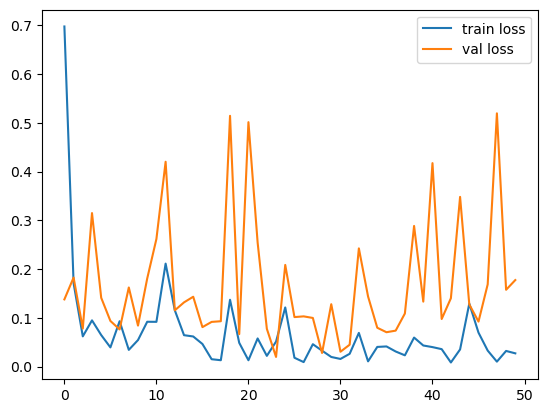

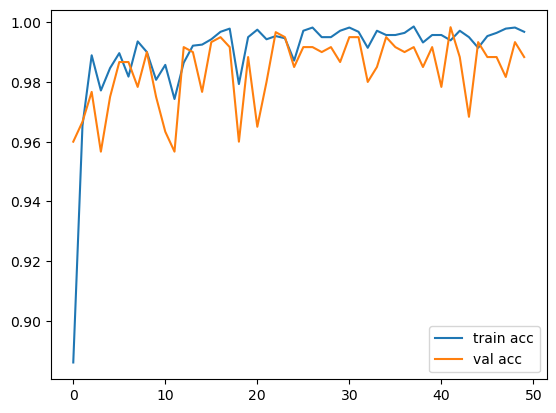

In [33]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

## save the model

In [35]:
# save it as a h5 file in densenet model

from tensorflow.keras.models import load_model

model.save('oil_densenet.h5')

In [36]:
#load the model

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

## load the model

In [38]:
model=load_model('oil_densenet.h5')


In [39]:
ref = dict(zip(list(train_set.class_indices.values()),list(train_set.class_indices.keys())))

## test the model 

In [41]:
def prediction(path):
  img = image.load_img(path, target_size=(224, 224))
  i = image.img_to_array(img)
  i = np.expand_dims(i, axis=0)
  img = preprocess_input(i)
  pred = np.argmax(model.predict(img), axis=1)
  print(f"the image belongs to {ref[pred[0]]}")

In [42]:
path = r"C:\Users\harsh\Oil Spil Dataset\dataset\Validation\Oil Spill\AUG_oil_spill00003.jpg"
prediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
the image belongs to Non Oil Spill


In [48]:
# Access the training and validation accuracy after training
train_accuracy = r.history['accuracy'][-1]  # Last training accuracy
val_accuracy = r.history['val_accuracy'][-1]  # Last validation accuracy

print(f"Final Training Accuracy: {train_accuracy}")
print(f"Final Validation Accuracy: {val_accuracy}")


Final Training Accuracy: 0.9967857003211975
Final Validation Accuracy: 0.9883333444595337


In [43]:
train_set.class_indices

{'Non Oil Spill': 0, 'Oil Spill': 1}

In [50]:
def prediction(path):
  img = image.load_img(path, target_size=(224, 224))
  i = image.img_to_array(img)
  i = np.expand_dims(i, axis=0)
  img = preprocess_input(i)
  pred = np.argmax(model.predict(img), axis=1)

  print(pred)

In [52]:
path = r"C:\Users\harsh\Oil Spil Dataset\dataset\Validation\Oil Spill\AUG_oil_spill00003.jpg"
prediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[0]


# model prediction

In [57]:
#load the model
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('densenet.h5')
from PIL import Image
import numpy as np

def prediction(path):
    img = image.load_img(path, target_size=(224, 224))
    i = image.img_to_array(img)
    i = np.expand_dims(i, axis=0)
    img = preprocess_input(i)
    pred = np.argmax(model.predict(img), axis=1)
    print(pred)
  
path = r"C:\Users\harsh\Oil Spil Dataset\dataset\Validation\Oil Spill\AUG_oil_spill00003.jpg"
prediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[0]


## final prediction code

In [63]:
#load the model
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('oil_densenet.h5')
from PIL import Image
import numpy as np

def prediction(path):
    img = image.load_img(path, target_size=(224, 224))
    i = image.img_to_array(img)
    i = np.expand_dims(i, axis=0)
    img = preprocess_input(i)
    pred = np.argmax(model.predict(img), axis=1)

    class_mapping = {
        0: 'NO',
        1: 'Yes'}
    print(class_mapping[pred[0]])
  
path = r"C:\Users\harsh\Oil Spil Dataset\dataset\Validation\Non Oil Spill\AUG_Non_oil_spill00029.jpg"
prediction(path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
NO


## image visualisation

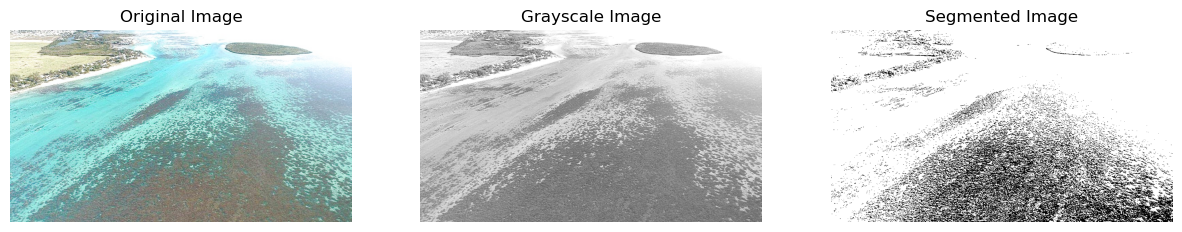

In [67]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = r"C:\Users\harsh\Oil Spil Dataset\dataset\Validation\Oil Spill\AUG_oil_spill00003.jpg"


image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the original, grayscale, and segmented images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Segmented Image
plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()


In [73]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.applications.densenet import preprocess_input

# Load the trained model
model = load_model('oil_densenet.h5')

def predict_all_images_in_folder(folder_path):
    # Loop through all the images in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image (optional, depending on your folder's content)
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Full path of the image
            img_path = os.path.join(folder_path, filename)
            
            # Call the prediction function for each image
            pred = prediction(img_path)
            
            # You can also print the result alongside the filename for clarity
            print(f"Prediction for {filename}: {pred}")

def prediction(path):
    # Load and preprocess the image
    img = image.load_img(path, target_size=(224, 224))
    i = image.img_to_array(img)
    i = np.expand_dims(i, axis=0)  # Add batch dimension
    img = preprocess_input(i)  # Preprocess the image
    
    # Predict the class and return the result
    pred = np.argmax(model.predict(img), axis=1)
    return pred[0]  # Return the predicted class (as a single integer)

# Path to the folder with images you want to predict
folder_path = r"C:\Users\harsh\Oil Spil Dataset\dataset\Validation\Non Oil Spill"

# Call the function to predict all images in the folder
predict_all_images_in_folder(folder_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction for AUG_Non_oil_spill00001.jpg: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction for AUG_Non_oil_spill00002.jpg: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prediction for AUG_Non_oil_spill00003.jpg: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction for AUG_Non_oil_spill00004.jpg: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction for AUG_Non_oil_spill00005.jpg: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction for AUG_Non_oil_spill00006.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction for AUG_Non_oil_spill00007.jpg: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction for AUG_Non_oil_spill00008.jpg: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prediction for AUG_Non_oil_spill00009.jpg: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Prediction for AUG_Non_oil_spill00010.jpg: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction for AUG_Non_oil_spill00011.jpg: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction for AUG_Non_oil_spill00012.jpg: 0
1/1 ━━

In [71]:
train_set.class_indices

{'Non Oil Spill': 0, 'Oil Spill': 1}